In [16]:
import matplotlib.pyplot as plt

# ----------------------------
# DATASET (15 days)
# ----------------------------

time_data = [
 (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
 (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
 (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
 (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
 (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]

# ===================================================
# TASK 1 – Classify Study Time
# ===================================================

low, moderate, high = [], [], []

for s, e, sl in time_data:
    if s < 3:
        low.append(s)
    elif 3 <= s <= 5:
        moderate.append(s)
    else:
        high.append(s)

print("Low study:", low)
print("Moderate study:", moderate)
print("High study:", high)

Low study: [2.5, 1.5, 2.0, 2.5]
Moderate study: [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High study: [5.5, 6.0]


In [17]:
# ===================================================
# TASK 2 – Counts
# ===================================================

print("Days with LOW study:", len(low))
print("Days with MODERATE study:", len(moderate))
print("Days with HIGH study:", len(high))

Days with LOW study: 4
Days with MODERATE study: 9
Days with HIGH study: 2


In [18]:
# ===================================================
# TASK 3 – Convert study hours to minutes
# ===================================================

study_minutes = [s * 60 for s, _, _ in time_data]
print("Study minutes:", study_minutes)

Study minutes: [210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]


In [19]:
# ===================================================
# TASK 4 – Averages
# ===================================================

study_hours = [s for s, _, _ in time_data]
ent_hours = [e for _, e, _ in time_data]
sleep_hours = [sl for _, _, sl in time_data]

avg_study = sum(study_hours) / len(study_hours)
avg_ent = sum(ent_hours) / len(ent_hours)
avg_sleep = sum(sleep_hours) / len(sleep_hours)

print("Average study hours:", avg_study)
print("Average entertainment hours:", avg_ent)
print("Average sleep hours:", avg_sleep)

Average study hours: 3.7
Average entertainment hours: 2.5
Average sleep hours: 7.166666666666667


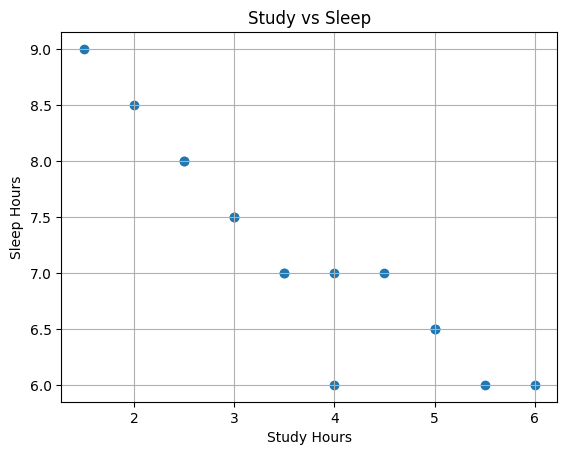

In [20]:
# ===================================================
# TASK 5 – Scatter Plot (Study vs Sleep)
# ===================================================

plt.scatter(study_hours, sleep_hours)
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study vs Sleep")
plt.grid(True)
plt.show()

In [21]:
# ===================================================
# RECURSION – Task 1
# Sum of Nested List
# ===================================================

def sum_nested_list(nlst):
    total = 0
    for x in nlst:
        if isinstance(x, list):
            total += sum_nested_list(x)
        else:
            total += x
    return total

nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]
print("Sum of nested list:", sum_nested_list(nested_list))

Sum of nested list: 36


In [22]:
# ===================================================
# RECURSION – Task 2
# Permutations of a String
# ===================================================

def generate_permutations(s):
    results = []

    def perm(prefix, rest):
        if not rest:
            results.append(prefix)
            return
        seen = set()
        for i, ch in enumerate(rest):
            if ch in seen:
                continue
            seen.add(ch)
            perm(prefix + ch, rest[:i] + rest[i+1:])

    perm("", s)
    return sorted(results)

print("Permutations of 'abc':", generate_permutations("abc"))
print("Permutations of 'aab':", generate_permutations("aab"))

Permutations of 'abc': ['abc', 'acb', 'bac', 'bca', 'cab', 'cba']
Permutations of 'aab': ['aab', 'aba', 'baa']


In [23]:
# ===================================================
# RECURSION – Task 3
# Directory Size Calculation
# ===================================================

directory_structure = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    },
    "subdir2": {
        "subsubdir1": {
            "file5.txt": 250
        },
        "file6.txt": 150
    }
}

def calculate_directory_size(d):
    total = 0
    for k, v in d.items():
        if isinstance(v, dict):
            total += calculate_directory_size(v)
        else:
            total += v
    return total

print("Directory total size:", calculate_directory_size(directory_structure))

Directory total size: 1400


In [24]:
# ===================================================
# DP – Task 1
# Coin Change (Min Coins)
# ===================================================

def min_coins(coins, amount):
    dp = [float("inf")] * (amount + 1)
    dp[0] = 0
    for c in coins:
        for a in range(c, amount + 1):
            dp[a] = min(dp[a], dp[a - c] + 1)
    return dp[amount] if dp[amount] != float("inf") else -1

print("Min coins for 11 using [1,2,5]:", min_coins([1,2,5], 11))

Min coins for 11 using [1,2,5]: 3


In [25]:
# ===================================================
# DP – Task 2
# Longest Common Subsequence
# ===================================================

def longest_common_subsequence(s1, s2):
    n, m = len(s1), len(s2)
    dp = [[0]*(m+1) for _ in range(n+1)]

    for i in range(n-1, -1, -1):
        for j in range(m-1, -1, -1):
            if s1[i] == s2[j]:
                dp[i][j] = 1 + dp[i+1][j+1]
            else:
                dp[i][j] = max(dp[i+1][j], dp[i][j+1])
    return dp[0][0]

print("LCS length (abcde, ace):", longest_common_subsequence("abcde", "ace"))

LCS length (abcde, ace): 3


In [26]:
# ===================================================
# DP – Task 3
# 0/1 Knapsack
# ===================================================

def knapsack(weights, values, capacity):
    dp = [0] * (capacity + 1)
    for i in range(len(weights)):
        w = weights[i]
        v = values[i]
        for cap in range(capacity, w - 1, -1):
            dp[cap] = max(dp[cap], dp[cap - w] + v)
    return dp[capacity]

print("Knapsack result:", knapsack([1,3,4,5], [1,4,5,7], 7))

Knapsack result: 9
